# Chapter 3: Exercise 13

**Import packages**

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from ISLP.models import summarize

### (a) Generate a vector x containing n=100 observations from N(0, 1) distribution

In [20]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)

### (b) Generate a vector eps containing n=100 observations from N(0, 0.25) (mean=0, variance=0.25)

In [53]:
eps = rng.normal(loc=0, scale=np.sqrt(0.25), size=100)

### (c) Using x and eps generate a vector y according to $Y = -1 + 0.5X + \epsilon$

In [58]:
y = -1 + 0.5 * x + eps

In [59]:
len(y)

100

- **length(y)** = 100
- **$\beta_0$** = -1
- **$\beta_1$** = 0.5

### (d) Scatter plot between x and y

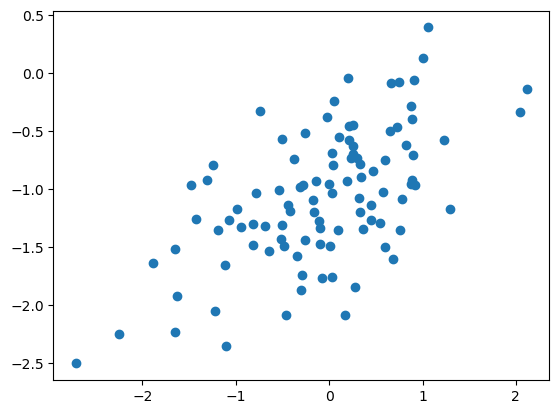

In [68]:
plt.scatter(x, y)

There appears to be a positive linear relationship between x and y.

### (e) Least squares linear model to predict y using x

In [78]:
dfx = pd.DataFrame({'intercept': np.ones(len(x)), 'x': x})

In [79]:
model = sm.OLS(y, dfx)
results = model.fit()

In [81]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0340,0.046,-22.238,0.0
x,0.4028,0.054,7.405,0.0


Our model performs surprisingly well. $-1.0340 = \hat{\beta_0} \approx \beta_0 = -1$ and $0.4028 = \hat{\beta_1} \approx \beta_1 = 0.5$

### (f) Plot of least squares line, population regression line, and scatterplot

In [88]:
beta0 = results.params[0]

In [89]:
beta1 = results.params[1]

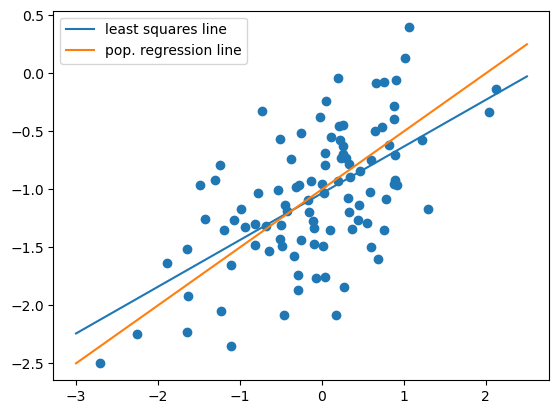

In [96]:
plt.scatter(x, y)
plt.plot([-3,2.5],[beta0 -3*beta1, beta0 + 2.5*beta1], label='least squares line')
plt.plot([-3,2.5],[-1 -3*0.5, -1 + 2.5*0.5], label='pop. regression line')
plt.legend()